# PHASE M10 — Global Explainability (Text-First Design)

In [1]:
import numpy as np
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay


In [3]:
import joblib

# Load optimized Random Forest model
model = joblib.load("../models/random_forest_optimized.pkl")

# Load processed feature matrix
X = joblib.load("../models/X_processed.pkl")

# Load target (optional for explainability)
y = joblib.load("../models/y.pkl")

print("Model loaded:", type(model))
print("X shape:", X.shape)
print("y shape:", y.shape)


Model loaded: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
X shape: (1338, 11)
y shape: (1338,)


In [4]:
# Load preprocessor
preprocessor = joblib.load("../models/preprocessor.pkl")


In [6]:
# Load preprocessor
preprocessor = joblib.load("../models/preprocessor.pkl")

# Original feature groups (from insurance dataset)
numerical_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

# Extract one-hot encoded categorical feature names
cat_feature_names = (
    preprocessor
    .named_transformers_["cat"]
    .named_steps["encoder"]
    .get_feature_names_out(categorical_features)
)

# Final feature names used by the model
feature_names = list(numerical_features) + list(cat_feature_names)

print("Total features:", len(feature_names))
feature_names[:10]


Total features: 11


['age',
 'bmi',
 'children',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast']

In [7]:
# Extract feature importance from Random Forest
importances = model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)


,Feature,Importance
5,smoker_no,0.356770
6,smoker_yes,0.272248
1,bmi,0.203643
0,age,0.128536
2,children,0.017834
7,region_northeast,0.004665
8,region_northwest,0.004449
9,region_southeast,0.003397
4,sex_male,0.002974
3,sex_female,0.002823


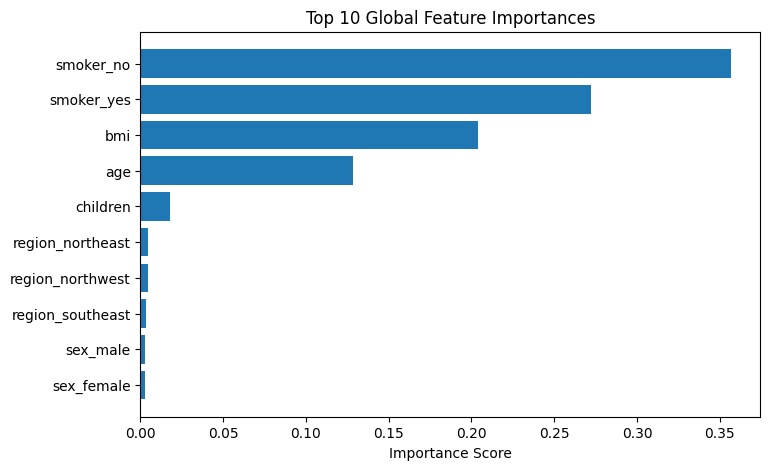

In [8]:
plt.figure(figsize=(8, 5))
plt.barh(
    importance_df["Feature"][:10][::-1],
    importance_df["Importance"][:10][::-1]
)
plt.xlabel("Importance Score")
plt.title("Top 10 Global Feature Importances")
plt.show()


In [9]:
print("""
GLOBAL FEATURE IMPORTANCE — TEXT EXPLANATION

Direction of impact:
• Higher importance score indicates stronger influence on medical cost prediction.

Magnitude explanation:
• Larger bars represent greater average contribution across all individuals.

Plain-language reasoning:
• Smoking status strongly affects medical costs due to increased health risks.
• BMI influences long-term health conditions and treatment expenses.
• Age contributes steadily as healthcare needs grow over time.
""")



GLOBAL FEATURE IMPORTANCE — TEXT EXPLANATION

Direction of impact:
• Higher importance score indicates stronger influence on medical cost prediction.

Magnitude explanation:
• Larger bars represent greater average contribution across all individuals.

Plain-language reasoning:
• Smoking status strongly affects medical costs due to increased health risks.
• BMI influences long-term health conditions and treatment expenses.
• Age contributes steadily as healthcare needs grow over time.



In [10]:
# Create SHAP TreeExplainer for Random Forest
explainer = shap.TreeExplainer(model)

# Compute SHAP values for all samples
shap_values = explainer.shap_values(X)


In [11]:
# Create SHAP TreeExplainer for Random Forest
explainer = shap.TreeExplainer(model)

# Compute SHAP values for all samples
shap_values = explainer.shap_values(X)


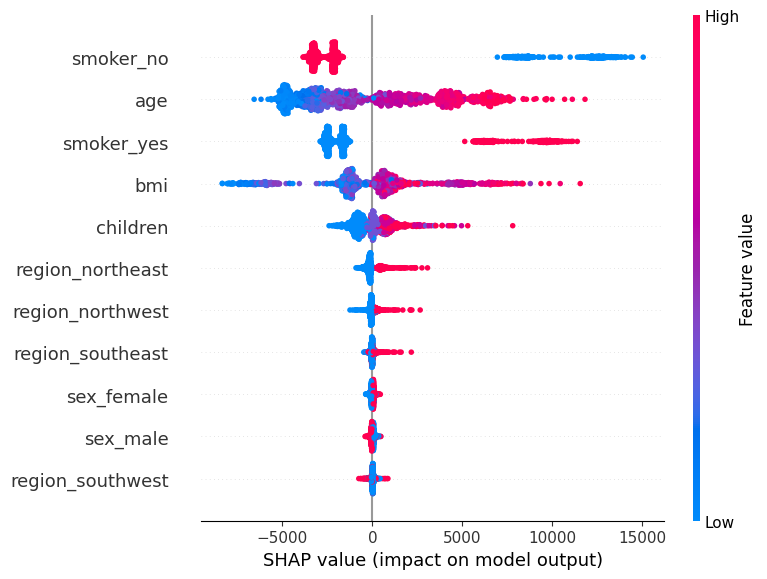

In [12]:
shap.summary_plot(
    shap_values,
    features=X,
    feature_names=feature_names,
    show=True
)


In [13]:
print("""
SHAP SUMMARY PLOT — TEXT EXPLANATION

Direction of impact:
• Red points represent higher feature values.
• Blue points represent lower feature values.

Magnitude explanation:
• Wider horizontal spread indicates stronger global impact on predictions.

Plain-language reasoning:
• Smoking-related features push predicted costs upward.
• Higher BMI values increase expected medical expenses.
• Age shows consistent positive influence across most individuals.
""")



SHAP SUMMARY PLOT — TEXT EXPLANATION

Direction of impact:
• Red points represent higher feature values.
• Blue points represent lower feature values.

Magnitude explanation:
• Wider horizontal spread indicates stronger global impact on predictions.

Plain-language reasoning:
• Smoking-related features push predicted costs upward.
• Higher BMI values increase expected medical expenses.
• Age shows consistent positive influence across most individuals.



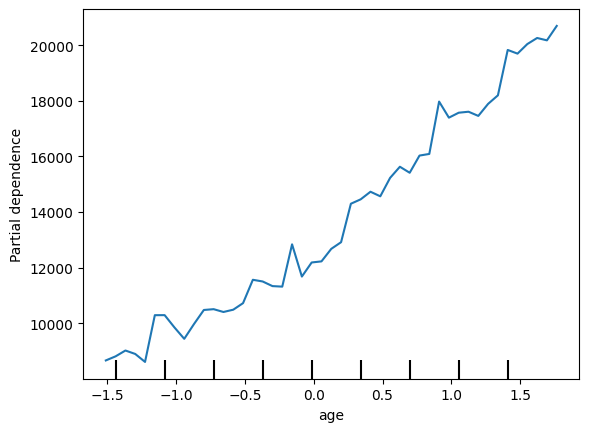

In [14]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=[feature_names.index("age")],
    feature_names=feature_names
)
plt.show()


In [15]:
print("""
PARTIAL DEPENDENCE PLOT — TEXT EXPLANATION

Direction of impact:
• Upward curve shows predicted medical cost increases with age.

Magnitude explanation:
• Steeper slope indicates higher sensitivity to age changes.

Plain-language reasoning:
• Older individuals generally require more frequent and costly
  medical care, leading to higher insurance charges.
""")



PARTIAL DEPENDENCE PLOT — TEXT EXPLANATION

Direction of impact:
• Upward curve shows predicted medical cost increases with age.

Magnitude explanation:
• Steeper slope indicates higher sensitivity to age changes.

Plain-language reasoning:
• Older individuals generally require more frequent and costly
  medical care, leading to higher insurance charges.

